## Creating a ML model to predict price of a house after cleaning the data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
kc_data = pd.read_csv(r'C:\Users\fakhr\Experimental_design_for_data_analysis\Dataset\kc_house_data.csv')

In [3]:
kc_data.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7870,7203100120,20140616T000000,680000.0,4,2.75,2500,4950,2.0,0,0,...,8,2500.0,0,2010,0,98053,47.6964,-122.017,2500,4950
12372,5244800695,20140616T000000,524000.0,2,1.00,1120,2000,1.5,0,0,...,7,1120.0,0,1910,0,98109,47.6454,-122.354,1500,4000
5700,5540000010,20140815T000000,259950.0,3,1.50,1350,7827,1.0,0,0,...,7,1350.0,0,1968,0,98030,47.3786,-122.219,1900,7827
5165,6673050020,20150401T000000,300000.0,6,2.50,2590,11250,1.0,0,0,...,8,1390.0,1200,1978,0,98055,47.4608,-122.196,2270,8360
15966,6641020050,20140618T000000,630000.0,4,2.50,2807,9430,2.0,0,0,...,8,2807.0,0,1996,0,98028,47.7449,-122.223,2028,11056
9110,8650700090,20140813T000000,1052500.0,4,2.75,3950,12840,2.0,0,0,...,8,3950.0,0,1960,0,98040,47.5489,-122.219,2350,12507
11479,3904990260,20140724T000000,545800.0,4,2.50,1980,4500,2.0,0,0,...,8,1980.0,0,1989,0,98029,47.5790,-122.001,1770,4595
6386,8850000285,20140612T000000,350000.0,4,2.25,2300,4600,1.5,0,0,...,7,1340.0,960,1904,0,98144,47.5895,-122.311,1540,3000
48,9215400105,20150428T000000,450000.0,3,1.75,1250,5963,1.0,0,0,...,7,1250.0,0,1953,0,98115,47.6796,-122.301,970,5100
9127,6303400981,20150113T000000,190000.0,3,1.75,1160,5850,1.0,0,0,...,6,1160.0,0,1918,0,98146,47.5064,-122.356,1110,8382


In [4]:
kc_data.shape   # getting structure of data

(21613, 21)

In [5]:
kc_data = kc_data.drop(["id", "date", "zipcode", "lat", "long"], axis=1)  # dropping unwanted columns


In [6]:
kc_data.sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
512,1095000.0,5,3.50,4410,57063,2.0,0,0,4,9,4410.0,0,1990,0,2900,50529
9893,679000.0,3,2.50,1780,4320,2.0,0,0,4,8,1780.0,0,1930,1986,1690,4952
1999,722500.0,4,2.50,2460,9296,2.0,0,0,3,9,2460.0,0,1978,0,2730,9900
17602,115000.0,3,1.00,1080,6250,1.0,0,0,2,5,1080.0,0,1950,0,1070,6250
9222,289000.0,4,2.50,1961,3207,2.0,0,0,3,7,1961.0,0,2006,0,1961,3401
20958,269800.0,4,2.75,1830,3420,2.0,0,0,3,8,1830.0,0,2012,0,1813,3420
10468,2000000.0,4,3.75,2870,4500,2.0,0,3,3,10,2510.0,360,2012,0,2870,6354
8287,382000.0,3,3.25,1410,1253,3.0,0,0,3,8,1410.0,0,2005,0,1410,1253
6266,359000.0,4,1.75,1680,9244,2.0,0,0,3,8,1680.0,0,1991,0,1840,9387
6261,848000.0,5,1.75,2290,4320,2.0,0,0,3,7,1980.0,310,1928,0,2870,4320


In [7]:
# converts column into categorical data. Puts "ye_renovated" wherever values is greater than 1
kc_data.loc[kc_data["yr_renovated"]>1,"yr_renovated"]=1  

In [8]:
kc_data['yr_renovated'].head()

0    0
1    1
2    0
3    0
4    0
Name: yr_renovated, dtype: int64

In [9]:
kc_data.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above        True
sqft_basement    False
yr_built         False
yr_renovated     False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [10]:
kc_data.shape  #Number of records before dropping NULL records

(21613, 16)

In [11]:
kc_data.dropna(inplace=True)   # dropping all records having NULL values

In [12]:
kc_data.shape #Number of records after dropping NULL records

(21611, 16)

In [13]:
kc_data.isnull().any() 

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [14]:
kc_data.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [15]:
col=['waterfront','view', 'yr_renovated']  #rows to convert to category data type

In [16]:
for i in col:
    kc_data[i]=kc_data[i].astype('category', copy=False)

In [17]:
kc_data.dtypes

price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition           int64
grade               int64
sqft_above        float64
sqft_basement       int64
yr_built            int64
yr_renovated     category
sqft_living15       int64
sqft_lot15          int64
dtype: object

In [18]:
# kc_data.to_csv(r'C:\Users\fakhr\Experimental_design_for_data_analysis\Dataset\kc_house_cleaned.csv')  #putting cleaned data in csv

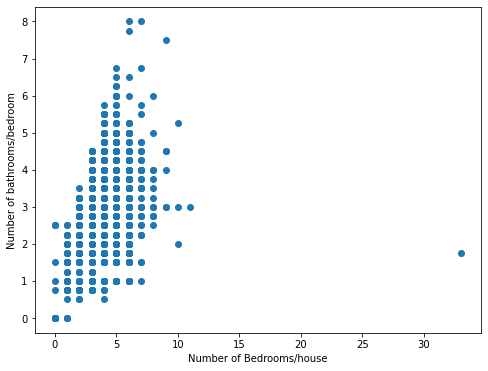

In [19]:
#visualising data 

fig,ax= plt.subplots(figsize=(8,6))  

plt.scatter(kc_data['bedrooms'], kc_data['bathrooms'])

plt.xlabel('Number of Bedrooms/house')
plt.ylabel('Number of bathrooms/bedroom')

plt.show()
            


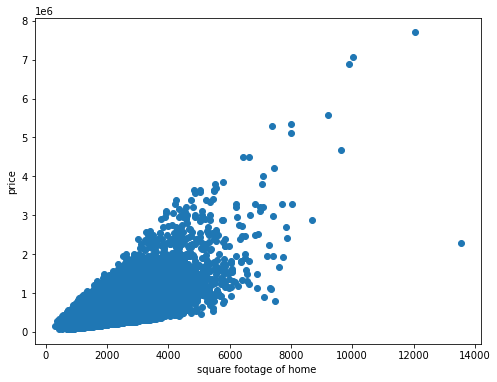

In [20]:
#visualising data of price w.r.t. square footage

plt.figure(figsize=(8,6))   

plt.scatter(kc_data['sqft_living'], kc_data['price'])

plt.xlabel('square footage of home ')
plt.ylabel('price')

plt.show()

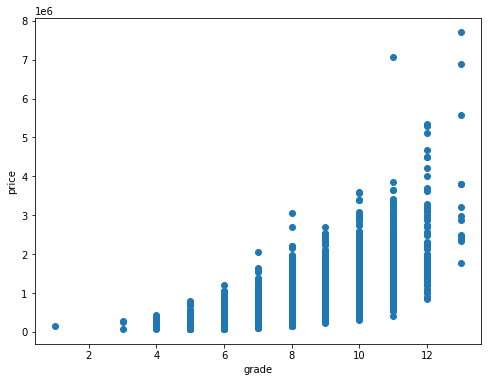

In [21]:
plt.figure(figsize=(8,6))

plt.scatter(kc_data['grade'], kc_data['price'])

plt.xlabel('grade')
plt.ylabel('price')

plt.show()

In [22]:
kc_data_corr=kc_data.corr()   #finding correlation between columns
kc_data_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
price,1.000000,0.308366,0.525150,0.702055,0.089661,0.256814,0.036379,0.667434,0.605567,0.323842,0.054006,0.585377,0.082448
bedrooms,0.308366,1.000000,0.515974,0.576763,0.031710,0.175418,0.028433,0.356998,0.477616,0.303251,0.154248,0.391670,0.029252
bathrooms,0.525150,0.515974,1.000000,0.754684,0.087730,0.500712,-0.124917,0.664981,0.685363,0.283737,0.505968,0.568626,0.087163
sqft_living,0.702055,0.576763,0.754684,1.000000,0.172841,0.354048,-0.058689,0.762727,0.876644,0.434925,0.318066,0.756440,0.183301
sqft_lot,0.089661,0.031710,0.087730,0.172841,1.000000,-0.005206,-0.008951,0.113617,0.183511,0.015301,0.053061,0.144605,0.718556
floors,0.256814,0.175418,0.500712,0.354048,-0.005206,1.000000,-0.263808,0.458208,0.523899,-0.245634,0.489361,0.279907,-0.011275
condition,0.036379,0.028433,-0.124917,-0.058689,-0.008951,-0.263808,1.000000,-0.144647,-0.158206,0.174273,-0.361384,-0.092795,-0.003397
grade,0.667434,0.356998,0.664981,0.762727,0.113617,0.458208,-0.144647,1.000000,0.755924,0.168375,0.446958,0.713197,0.119243
sqft_above,0.605567,0.477616,0.685363,0.876644,0.183511,0.523899,-0.158206,0.755924,1.000000,-0.051976,0.423915,0.731871,0.194048
sqft_basement,0.323842,0.303251,0.283737,0.434925,0.015301,-0.245634,0.174273,0.168375,-0.051976,1.000000,-0.133195,0.200341,0.017292


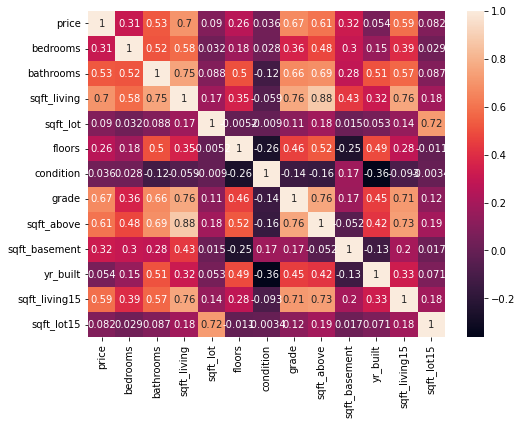

In [23]:
# Heatmap of correlation

plt.figure(figsize=(8,6))

sns.heatmap(kc_data_corr, annot=True)

plt.show()

## Now we create a ML model to get prices

In [24]:
y=kc_data['price']
x=kc_data.drop('price',axis=1)

In [25]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.4)

In [26]:
x_train.shape, y_train.shape

((12966, 15), (12966,))

In [27]:
x_test.shape, y_test.shape

((8645, 15), (8645,))

In [28]:
reg=LinearRegression().fit(x_train,y_train)   # This trains to get predicted price('y')
reg.score(x_test,y_test)   # The score shows that it is predicting pretty decent

0.6582884318316637

In [30]:
from sklearn.model_selection import  cross_val_score 

In [32]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [34]:
reg=LinearRegression()
scores=cross_val_score(reg,x,y,cv=5,scoring='r2')  # cross validates our data and gives r square values for our models

In [35]:
scores

array([0.65605518, 0.65077556, 0.64342074, 0.65808578, 0.62575563])